In [1]:
# 收集昌平沙河租房数据

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
def Select(table):
    rows=table.find_elements(By.TAG_NAME,'dl')
    page_data=[]
    for row in rows:
        intro=row.find_element(By.CLASS_NAME,'font15')
        rent=row.find_element(By.CLASS_NAME,'price')
        rows_data=[rent.text,intro.text]
        page_data.append(rows_data)
    df=pd.DataFrame(page_data)
    return df

#收集原始的有用数据

In [3]:
def SelectNum(table):
    rows=table.find_elements(By.TAG_NAME,'dl')
    page_data=[]
    for row in rows:
        intro=row.find_element(By.CLASS_NAME,'font15')
        rent=row.find_element(By.CLASS_NAME,'price')
        rows_data=[Text2Num(rent.text),find_m2(intro.text)]
        page_data.append(rows_data)
    df=pd.DataFrame(page_data)
    return df

# 收集但只保留数据的数值格式

In [4]:
def find_m2(text):
    num=re.search(r'(\d+(\.\d+)?)㎡',text)
    return float(num.group(1))

# 将文本中的房子面积数据提取出来

In [5]:
def Text2Num(text):
    matches=re.findall(r"[\d.]+", text)
    number=''.join(matches)
    return float(number)

# 将文本中的价格数据提取出来

In [6]:
driver=webdriver.Chrome()

url="https://zu.fang.com/house-a012-b02698/"
driver.get(url)
driver.maximize_window()

# 打开网页

In [7]:
string_list=[]
num_data=[]
for i in range(20):
    table=driver.find_element(By.CLASS_NAME,'houseList')
    df=Select(table)
    num_df=SelectNum(table)
    string_list.append(df)
    num_data.append(num_df)
    
    nextpage=driver.find_element(By.LINK_TEXT,'下一页')
    nextpage.click()
string_list
num_data

# 收集20页的数据

[         0     1
 0   2300.0  36.0
 1   1050.0  18.0
 2   2300.0  36.0
 3   1200.0  18.0
 4   1100.0  18.0
 5   1050.0  18.0
 6   1100.0  15.0
 7   4500.0  62.0
 8   1000.0  18.0
 9   5000.0  66.0
 10  1000.0  19.0
 11  1000.0  18.0
 12  1000.0  18.0
 13  1000.0  18.0
 14  1000.0  18.0
 15  1000.0  18.0
 16  1000.0  28.0
 17  1000.0  18.0
 18  1000.0  18.0
 19  1100.0  18.0
 20  1200.0  18.0
 21  1000.0  19.0
 22  1000.0  18.0
 23  1000.0  18.0
 24  1000.0  28.0
 25  1000.0  18.0
 26  1000.0  18.0
 27  1000.0  18.0
 28  1000.0  18.0
 29  2500.0  26.0
 30  1000.0  18.0
 31  1000.0  18.0
 32  5100.0  86.0
 33  1000.0  18.0
 34  4300.0  89.0
 35  1000.0  18.0
 36  1000.0  19.0
 37  1000.0  18.0
 38  1000.0  19.0
 39  1000.0  18.0
 40  1000.0  18.0
 41  1000.0  18.0
 42  1000.0  18.0
 43  4000.0  80.0
 44  1000.0  18.0
 45  1000.0  18.0
 46  1050.0  18.0
 47  1000.0  18.0
 48  2800.0  65.0
 49  1000.0  18.0
 50  4100.0  88.0
 51  2500.0  60.0
 52  1000.0  18.0
 53  3500.0  55.0
 54  4500.

In [8]:
driver.quit()

In [9]:
df_full=pd.concat(string_list)
df_full.columns=['rent(yuan)',
'introduction']
df_full

# 合并每页的数据并添加列名

,rent(yuan),introduction
0,2300,整租|1室1厅|36㎡|朝东南
1,1050,整租|1室0厅|18㎡|朝西南
2,2300,整租|1室0厅|36㎡|朝东南
3,1200,整租|1室0厅|18㎡|朝南北
4,1100,整租|1室0厅|18㎡|朝东西南北
...,...,...
55,4300,整租|2室1厅|69㎡|朝南北
56,4000,整租|2室1厅|82㎡|朝南北
57,2200,整租|1室0厅|33㎡|朝西
58,2000,合租主卧|4户合租|25㎡|朝南北


In [10]:
num_full=pd.concat(num_data)
num_full.columns=['rent(yuan)',
'm2']
num_full

# 合并每页的数据并添加列名

,rent(yuan),m2
0,2300.0,36.0
1,1050.0,18.0
2,2300.0,36.0
3,1200.0,18.0
4,1100.0,18.0
...,...,...
55,4300.0,69.0
56,4000.0,82.0
57,2200.0,33.0
58,2000.0,25.0


In [11]:
num_full.to_csv("zu_changping_shahe.csv",index=False)

#导出数据

Text(0, 0.5, 'quantity')

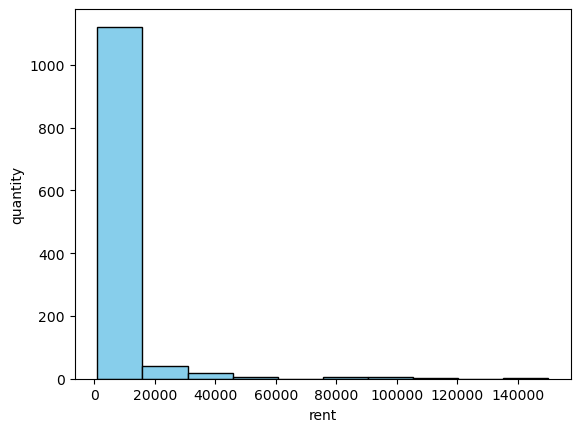

In [13]:
plt.hist(num_full['rent(yuan)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('rent')
plt.ylabel('quantity')

Text(0, 0.5, 'm2')

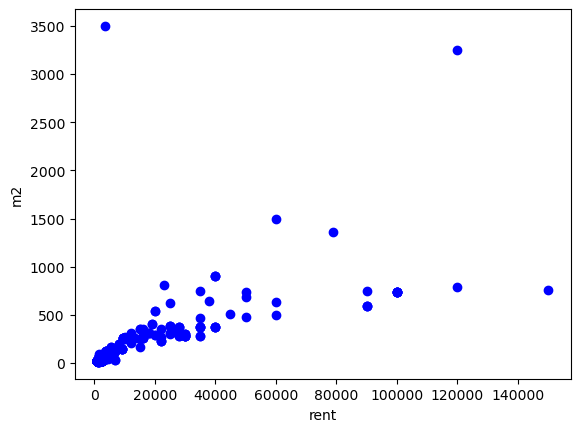

In [14]:
plt.scatter(num_full['rent(yuan)'], num_full['m2'], color='blue')
plt.xlabel('rent')
plt.ylabel('m2')

左上角存在将租金填到面积一栏的错误数据